In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
df = pd.read_csv("heart_disease.csv")

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [350]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8


In [351]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [352]:
targetColumn = "Heart_ stroke"

<AxesSubplot:>

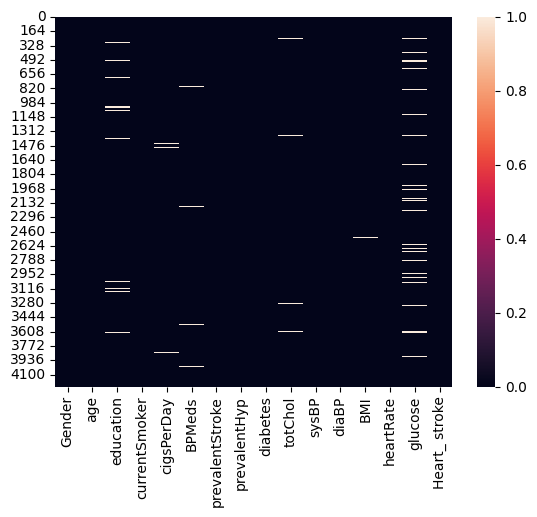

In [353]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='education', ylabel='age'>

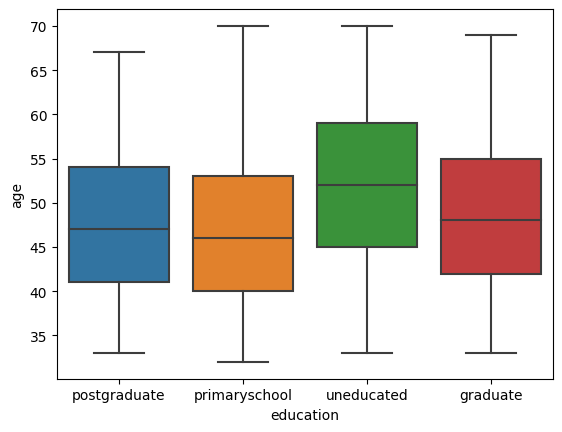

In [354]:
sns.boxplot(x = "education", y = "age", data = df)

In [355]:
df["education"].unique()

array(['postgraduate', 'primaryschool', 'uneducated', 'graduate', nan],
      dtype=object)

In [356]:
def replaceMissingEd(columns):
    Age = columns[0]
    Ed = columns[1]
    
    if pd.isnull(Ed):
        if Age >=47:
            return "postgraduate"
        elif Age <= 45:
            return "primaryschool"
        elif Age >=52:
            return "uneducated"
        else: 
            return "graduate"
    else:
        return Ed

In [357]:
df["education"] = df[["age", "education"]].apply(replaceMissingEd, axis=1)

In [358]:
df["education"]

0        postgraduate
1       primaryschool
2          uneducated
3            graduate
4            graduate
            ...      
4233       uneducated
4234         graduate
4235    primaryschool
4236       uneducated
4237    primaryschool
Name: education, Length: 4238, dtype: object

<AxesSubplot:>

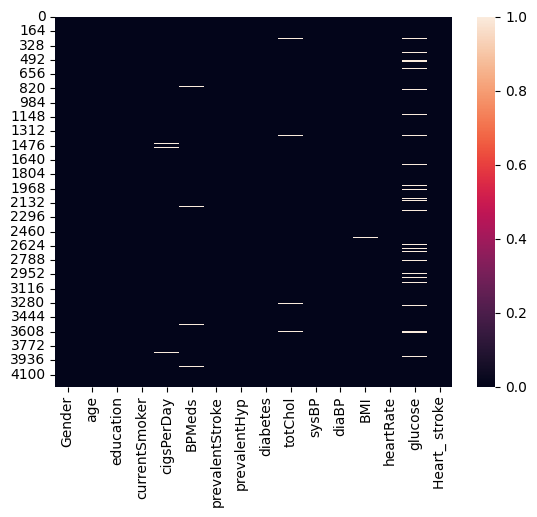

In [359]:
sns.heatmap(df.isnull())

## Replacing missing glucose with average per age

<AxesSubplot:xlabel='diabetes', ylabel='count'>

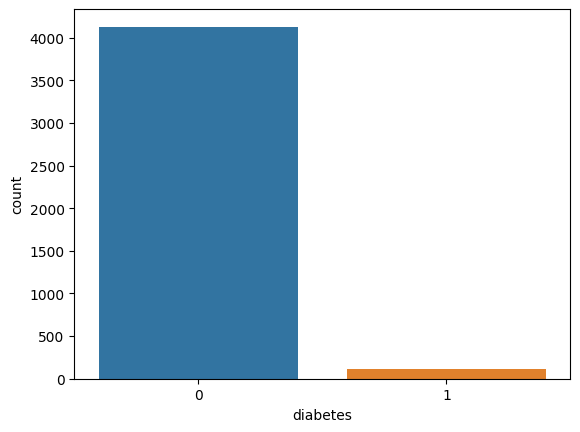

In [360]:
sns.countplot(x = df["diabetes"])

In [361]:
df.corrwith(df["glucose"]).sort_values(ascending = False)

glucose          1.000000
diabetes         0.617627
sysBP            0.140621
age              0.122256
heartRate        0.094500
BMI              0.087377
prevalentHyp     0.086834
diaBP            0.061231
BPMeds           0.051176
totChol          0.046408
currentSmoker   -0.056826
cigsPerDay      -0.058960
dtype: float64

In [362]:
dict(df.groupby(df["diabetes"]).mean()["glucose"])

{0: 79.48918558077436, 1: 170.33333333333334}

In [363]:
def replaceGlucose(columns):
    Diab = columns[0]
    Glucose = columns[1]
    
    if pd.isnull(Glucose):
        if Diab == 1:
            return 170
        else:
            return 79
    else:
        return Glucose

In [364]:
df["glucose"] = df[["diabetes", "glucose"]].apply(replaceGlucose, axis=1)

<AxesSubplot:>

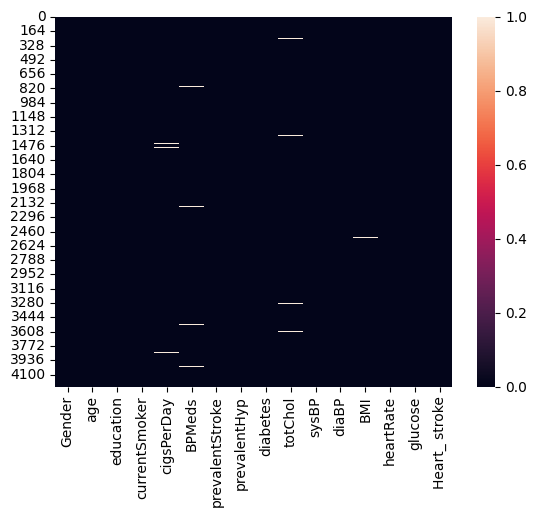

In [365]:
sns.heatmap(df.isnull())

In [366]:
## Dropping other missing items
## not too many that will effect the data too much 

In [367]:
df.dropna(axis=1, inplace=True)

<AxesSubplot:>

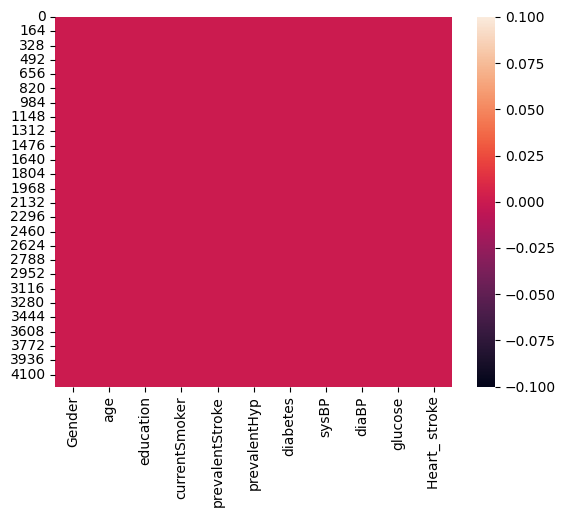

In [368]:
sns.heatmap(df.isnull())

In [369]:
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True)

In [370]:
educ = pd.get_dummies(df["education"], drop_first=True)

In [371]:
df = pd.concat([df, educ], axis=1)

In [372]:
df.drop("education", axis=1, inplace=True)

In [373]:
df["prevalentStroke"] = pd.get_dummies(df["prevalentStroke"], drop_first=True)

In [374]:
df["Heart_ stroke"] = pd.get_dummies(df["Heart_ stroke"], drop_first=True)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   uint8  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   prevalentStroke  4238 non-null   uint8  
 4   prevalentHyp     4238 non-null   int64  
 5   diabetes         4238 non-null   int64  
 6   sysBP            4238 non-null   float64
 7   diaBP            4238 non-null   float64
 8   glucose          4238 non-null   float64
 9   Heart_ stroke    4238 non-null   uint8  
 10  postgraduate     4238 non-null   uint8  
 11  primaryschool    4238 non-null   uint8  
 12  uneducated       4238 non-null   uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 256.7 KB


In [230]:
X = df.drop(targetColumn, axis=1).values
y = df[targetColumn].values

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [233]:
X_train.shape

(2966, 12)

In [58]:
X_test.shape

(1272, 12)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [61]:
X_train.shape

(2966, 12)

In [71]:
model = Sequential()
model.add(Dense(units=200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=160, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=130, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=130, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = BinaryCrossentropy(), optimizer = Adam(), metrics = ["accuracy"])

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
stop = EarlyStopping(patience=30)

In [74]:
model.fit(X_train,y_train, epochs = 300, validation_data = (X_test, y_test), callbacks = [stop])

Train on 2966 samples, validate on 1272 samples
Epoch 1/300
2966/2966 [==============================] - 3s 1ms/sample - loss: 0.8140 - accuracy: 0.7748 - val_loss: 0.5540 - val_accuracy: 0.8522
Epoch 2/300
2966/2966 [==============================] - 2s 658us/sample - loss: 0.5164 - accuracy: 0.8318 - val_loss: 0.5287 - val_accuracy: 0.8522
Epoch 3/300
2966/2966 [==============================] - 2s 567us/sample - loss: 0.4909 - accuracy: 0.8399 - val_loss: 0.5224 - val_accuracy: 0.8522
Epoch 4/300
2966/2966 [==============================] - 2s 544us/sample - loss: 0.4801 - accuracy: 0.8439 - val_loss: 0.4760 - val_accuracy: 0.8522
Epoch 5/300
2966/2966 [==============================] - 2s 531us/sample - loss: 0.4738 - accuracy: 0.8446 - val_loss: 0.4829 - val_accuracy: 0.8522
Epoch 6/300
2966/2966 [==============================] - 2s 550us/sample - loss: 0.4646 - accuracy: 0.8446 - val_loss: 0.4480 - val_accuracy: 0.8522
Epoch 7/300
2966/2966 [==============================] - 2s 

2966/2966 [==============================] - 2s 542us/sample - loss: 0.4093 - accuracy: 0.8486 - val_loss: 0.4020 - val_accuracy: 0.8506
Epoch 56/300
2966/2966 [==============================] - 2s 764us/sample - loss: 0.4104 - accuracy: 0.8479 - val_loss: 0.4210 - val_accuracy: 0.8506
Epoch 57/300
2966/2966 [==============================] - 2s 654us/sample - loss: 0.4129 - accuracy: 0.8483 - val_loss: 0.4060 - val_accuracy: 0.8506
Epoch 58/300
2966/2966 [==============================] - 2s 643us/sample - loss: 0.4092 - accuracy: 0.8490 - val_loss: 0.4001 - val_accuracy: 0.8506
Epoch 59/300
2966/2966 [==============================] - 2s 606us/sample - loss: 0.4106 - accuracy: 0.8483 - val_loss: 0.3945 - val_accuracy: 0.8498
Epoch 60/300
2966/2966 [==============================] - 2s 594us/sample - loss: 0.4089 - accuracy: 0.8476 - val_loss: 0.4168 - val_accuracy: 0.8522
Epoch 61/300
2966/2966 [==============================] - 2s 528us/sample - loss: 0.4119 - accuracy: 0.8479 - val

2966/2966 [==============================] - 2s 734us/sample - loss: 0.4069 - accuracy: 0.8476 - val_loss: 0.3988 - val_accuracy: 0.8522


<AxesSubplot:>

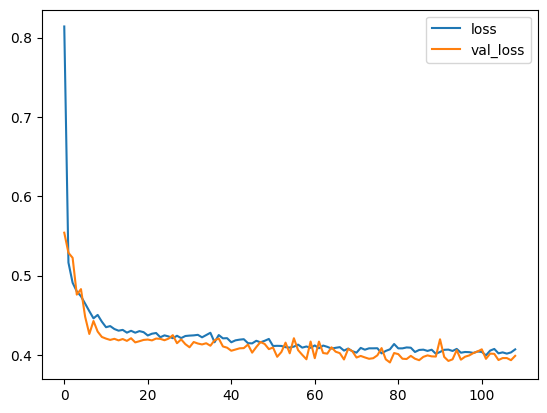

In [75]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

<AxesSubplot:>

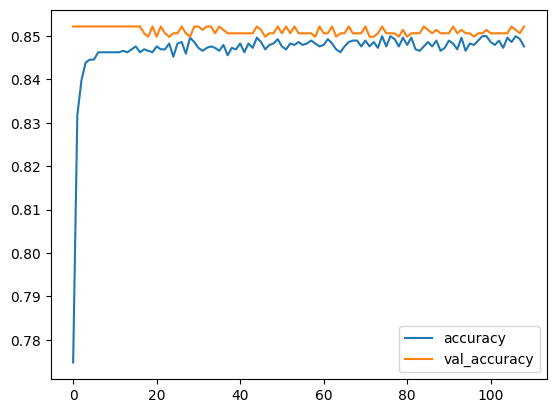

In [77]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot()

In [78]:
predictions = model.predict_classes(X_test)

In [79]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

## Poor predictions on 1(heart disease)
- this is certainly reladted to an unbalanced Data set
- We may need to sample out and create a balanced data set
- below we will use an autoencoder to try to improve this

In [81]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1266
           1       0.02      0.50      0.03         6

    accuracy                           0.85      1272
   macro avg       0.51      0.68      0.48      1272
weighted avg       0.99      0.85      0.92      1272



In [121]:
encoder = Sequential()
encoder.add(Dense(units=6, activation="relu", input_shape = [12]))


In [122]:
decoder = Sequential()
decoder.add(Dense(units=12, activation="relu", input_shape = [6]))

In [123]:
autoEncoder = Sequential([encoder, decoder])

In [124]:
autoEncoder.compile(loss = BinaryCrossentropy(), optimiser = Adam())

In [125]:
X.shape

(4238, 12)

In [126]:
autoEncoder.fit(X,X, epochs =10)

Train on 4238 samples
Epoch 1/10
4238/4238 [==============================] - 1s 137us/sample - loss: 30.8794
Epoch 2/10
4238/4238 [==============================] - 0s 36us/sample - loss: -10.7307
Epoch 3/10
4238/4238 [==============================] - 0s 36us/sample - loss: -14.4968
Epoch 4/10
4238/4238 [==============================] - 0s 40us/sample - loss: -14.7378
Epoch 5/10
4238/4238 [==============================] - 0s 39us/sample - loss: -14.8542
Epoch 6/10
4238/4238 [==============================] - 0s 40us/sample - loss: -14.7597
Epoch 7/10
4238/4238 [==============================] - 0s 40us/sample - loss: -14.7960
Epoch 8/10
4238/4238 [==============================] - 0s 41us/sample - loss: -14.9025
Epoch 9/10
4238/4238 [==============================] - 0s 39us/sample - loss: -14.9663
Epoch 10/10
4238/4238 [==============================] - 0s 42us/sample - loss: -14.9334


<AxesSubplot:>

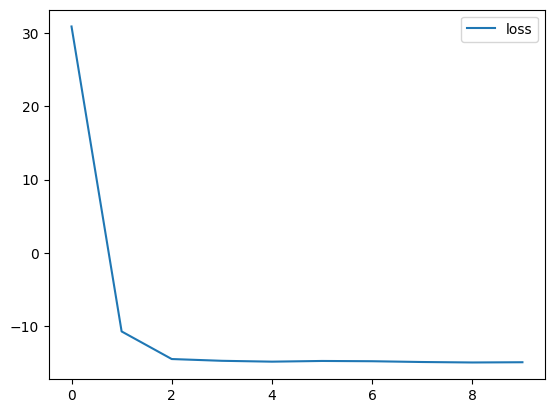

In [127]:
pd.DataFrame(autoEncoder.history.history).plot()

In [128]:
encoderPredicitons = encoder.predict(X)

In [130]:
encoderPredicitons.shape

(4238, 6)

In [135]:
ecoDF = pd.DataFrame(encoderPredicitons)[[1,5]]

In [167]:
ecoDF["target"] = df["Heart_ stroke"]

In [168]:
ecoDF

,1,5,target
0,33.858246,18.587290,0
1,34.048580,20.003056,0
2,29.986753,20.039352,0
3,49.321789,28.686628,1
4,36.747150,20.385021,0
...,...,...,...
4233,25.458544,15.701841,1
4234,31.728964,21.585451,0
4235,39.040302,20.163141,0
4236,32.575607,19.403822,0


In [169]:
X = ecoDF.drop("target", axis=1).values
y = ecoDF["target"].values

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
scalar = MinMaxScaler()

In [174]:
X_train = scalar.fit_transform(X_train)

In [175]:
X_test = scalar.transform(X_test)

In [178]:
model = Sequential()
model.add(Dense(units=200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=160, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=130, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=130, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = BinaryCrossentropy(), optimizer = Adam(), metrics = ["accuracy"])

In [179]:
from tensorflow.keras.callbacks import EarlyStopping

In [180]:
stop = EarlyStopping(patience=30)

In [181]:
model.fit(X_train,y_train, epochs = 300, validation_data = (X_test, y_test), callbacks = [stop])

Train on 2966 samples, validate on 1272 samples
Epoch 1/300
2966/2966 [==============================] - 3s 1ms/sample - loss: 0.4772 - accuracy: 0.8385 - val_loss: 0.4410 - val_accuracy: 0.8522
Epoch 2/300
2966/2966 [==============================] - 2s 628us/sample - loss: 0.4361 - accuracy: 0.8463 - val_loss: 0.4165 - val_accuracy: 0.8522
Epoch 3/300
2966/2966 [==============================] - 2s 670us/sample - loss: 0.4295 - accuracy: 0.8463 - val_loss: 0.4096 - val_accuracy: 0.8522
Epoch 4/300
2966/2966 [==============================] - 2s 581us/sample - loss: 0.4230 - accuracy: 0.8463 - val_loss: 0.4152 - val_accuracy: 0.8522
Epoch 5/300
2966/2966 [==============================] - 2s 555us/sample - loss: 0.4285 - accuracy: 0.8463 - val_loss: 0.4085 - val_accuracy: 0.8522
Epoch 6/300
2966/2966 [==============================] - 2s 564us/sample - loss: 0.4215 - accuracy: 0.8463 - val_loss: 0.4144 - val_accuracy: 0.8522
Epoch 7/300
2966/2966 [==============================] - 2s 

2966/2966 [==============================] - 2s 638us/sample - loss: 0.4107 - accuracy: 0.8493 - val_loss: 0.4041 - val_accuracy: 0.8514
Epoch 56/300
2966/2966 [==============================] - 2s 597us/sample - loss: 0.4071 - accuracy: 0.8486 - val_loss: 0.4025 - val_accuracy: 0.8522
Epoch 57/300
2966/2966 [==============================] - 2s 574us/sample - loss: 0.4126 - accuracy: 0.8469 - val_loss: 0.4033 - val_accuracy: 0.8514
Epoch 58/300
2966/2966 [==============================] - 2s 591us/sample - loss: 0.4104 - accuracy: 0.8483 - val_loss: 0.4021 - val_accuracy: 0.8514
Epoch 59/300
2966/2966 [==============================] - 2s 598us/sample - loss: 0.4076 - accuracy: 0.8490 - val_loss: 0.4049 - val_accuracy: 0.8522
Epoch 60/300
2966/2966 [==============================] - 2s 602us/sample - loss: 0.4108 - accuracy: 0.8490 - val_loss: 0.4039 - val_accuracy: 0.8522
Epoch 61/300
2966/2966 [==============================] - 2s 573us/sample - loss: 0.4097 - accuracy: 0.8496 - val

<AxesSubplot:>

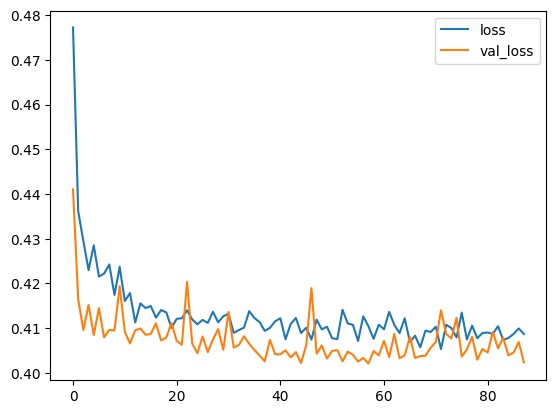

In [182]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

<AxesSubplot:>

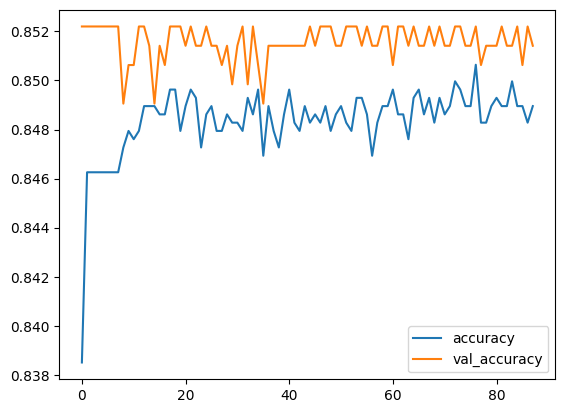

In [183]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot()

In [184]:
predictions = model.predict_classes(X_test)

In [185]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1267
           1       0.01      0.40      0.02         5

    accuracy                           0.85      1272
   macro avg       0.50      0.63      0.47      1272
weighted avg       0.99      0.85      0.92      1272



In [186]:
print(confusion_matrix(predictions, y_test))

[[1081  186]
 [   3    2]]


In [187]:
print(explained_variance_score(predictions, y_test))

-31.662825572217834


## Sampling

In [376]:
heartDisease = df[df["Heart_ stroke"] ==1].reset_index()

In [377]:
heartDisease.shape

(644, 14)

In [378]:
notHD = df[df["Heart_ stroke"] == 0].reset_index()

In [379]:
df = pd.concat([positiveHeart, NoHeartDeseast], axis=0)

In [380]:
df

,Gender,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,glucose,Heart_ stroke,postgraduate,primaryschool,uneducated
3,0,61,1,0,1,0,150.0,95.0,103.0,1,0,0,0
6,0,63,0,0,0,0,138.0,71.0,85.0,1,0,0,1
15,0,38,1,0,1,0,140.0,90.0,70.0,1,0,1,0
17,0,46,1,0,0,0,112.0,78.0,89.0,1,0,1,0
25,1,47,1,0,0,0,102.0,68.0,66.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,0,37,0,0,0,0,105.0,73.0,80.0,0,0,0,0
770,1,38,1,0,0,0,123.0,69.0,70.0,0,0,1,0
772,1,40,1,0,0,0,141.0,102.0,67.0,0,0,1,0
774,0,54,0,0,0,0,118.0,84.0,82.0,0,0,1,0


<AxesSubplot:xlabel='Heart_ stroke', ylabel='count'>

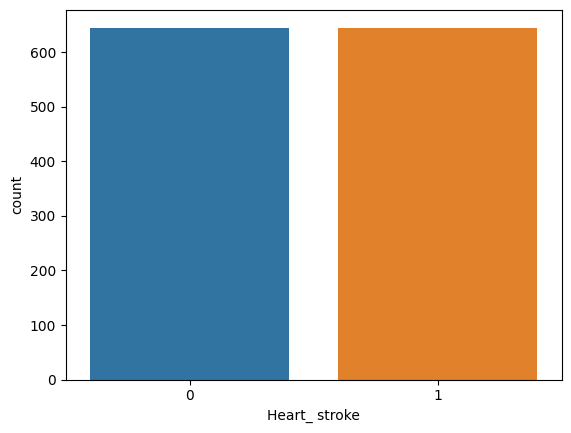

In [381]:
sns.countplot(x = df["Heart_ stroke"])

In [696]:
X = df.drop(targetColumn, axis=1).values
y = df[targetColumn].values

In [697]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [698]:
scalar = MinMaxScaler()

In [699]:
trainScaledVaules = scalar.fit_transform(pd.DataFrame(X_train)[[1,6,7,8]].values)

In [700]:
trainScaledVaules

array([[0.75675676, 0.29230769, 0.38043478, 0.05649718],
       [0.51351351, 0.45846154, 0.54347826, 0.52259887],
       [0.72972973, 0.27384615, 0.23913043, 0.12429379],
       ...,
       [0.51351351, 0.61230769, 0.7173913 , 0.12146893],
       [0.45945946, 0.24307692, 0.40217391, 0.15254237],
       [0.10810811, 0.20307692, 0.4076087 , 0.11864407]])

In [701]:
xtrainDF = pd.DataFrame(X_train)

In [702]:
xtrainDF = pd.concat([xtrainDF, pd.DataFrame(trainScaledVaules, columns=[12,13,14,15])], axis=1)

In [703]:
xtrainDF.drop([1,6,7,8], axis=1, inplace=True)

In [704]:
X_train = xtrainDF.values

In [705]:
testScaledVaules = scalar.transform(pd.DataFrame(X_test)[[1,6,7,8]].values)

In [706]:
xtestDF = pd.DataFrame(X_test)

In [707]:
xtestDF = pd.concat([xtestDF, pd.DataFrame(testScaledVaules, columns=[12,13,14,15])], axis=1)

In [708]:
xtestDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,37.0,1.0,0.0,0.0,0.0,115.0,79.0,79.0,0.0,1.0,0.0,0.108108,0.181538,0.336957,0.110169
1,1.0,40.0,1.0,0.0,0.0,0.0,129.0,73.0,80.0,0.0,0.0,0.0,0.189189,0.267692,0.271739,0.112994
2,1.0,61.0,0.0,0.0,0.0,0.0,124.5,80.0,76.0,0.0,0.0,1.0,0.756757,0.240000,0.347826,0.101695
3,0.0,64.0,0.0,0.0,1.0,0.0,295.0,135.0,70.0,0.0,0.0,1.0,0.837838,1.289231,0.945652,0.084746
4,0.0,58.0,0.0,0.0,1.0,0.0,158.0,101.0,77.0,0.0,0.0,1.0,0.675676,0.446154,0.576087,0.104520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,1.0,52.0,1.0,0.0,1.0,0.0,134.0,98.0,89.0,0.0,0.0,1.0,0.513514,0.298462,0.543478,0.138418
254,0.0,38.0,1.0,0.0,0.0,0.0,112.0,68.5,67.0,0.0,0.0,1.0,0.135135,0.163077,0.222826,0.076271
255,1.0,38.0,1.0,0.0,1.0,0.0,145.5,87.0,89.0,0.0,1.0,0.0,0.135135,0.369231,0.423913,0.138418
256,0.0,49.0,1.0,0.0,0.0,0.0,109.0,70.0,73.0,0.0,0.0,1.0,0.432432,0.144615,0.239130,0.093220


In [709]:
xtestDF.drop([1,6,7,8], axis=1, inplace=True)

In [710]:
X_test = xtestDF.values

In [711]:
model = Sequential()
model.add(Dense(units=200, activation="relu"))
model.add(Dense(units=160, activation="relu"))
model.add(Dense(units=130, activation="relu"))
model.add(Dense(units=130, activation="relu"))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=80, activation="relu"))
model.add(Dense(units=70, activation="relu"))
model.add(Dense(units=60, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=40, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = BinaryCrossentropy(), optimizer = Adam(), metrics = ["accuracy"])

In [712]:
stop = EarlyStopping(patience=30)

In [713]:
model.fit(X_train,y_train, epochs = 300, validation_data = (X_test, y_test), callbacks = [stop])

Train on 1031 samples, validate on 258 samples
Epoch 1/300
1031/1031 [==============================] - 2s 2ms/sample - loss: 0.6870 - accuracy: 0.5422 - val_loss: 0.6413 - val_accuracy: 0.6434
Epoch 2/300
1031/1031 [==============================] - 1s 906us/sample - loss: 0.6607 - accuracy: 0.6314 - val_loss: 0.6145 - val_accuracy: 0.6473
Epoch 3/300
1031/1031 [==============================] - 1s 930us/sample - loss: 0.6451 - accuracy: 0.6547 - val_loss: 0.6232 - val_accuracy: 0.6628
Epoch 4/300
1031/1031 [==============================] - 1s 854us/sample - loss: 0.6249 - accuracy: 0.6605 - val_loss: 0.6065 - val_accuracy: 0.6628
Epoch 5/300
1031/1031 [==============================] - 1s 793us/sample - loss: 0.6127 - accuracy: 0.6654 - val_loss: 0.6046 - val_accuracy: 0.6589
Epoch 6/300
1031/1031 [==============================] - 1s 806us/sample - loss: 0.6233 - accuracy: 0.6508 - val_loss: 0.6166 - val_accuracy: 0.6512
Epoch 7/300
1031/1031 [==============================] - 1s 1

<AxesSubplot:>

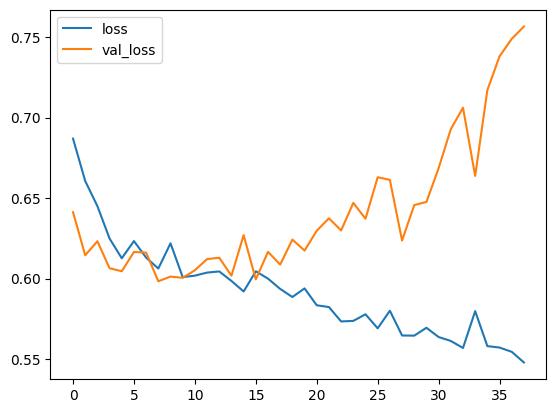

In [714]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

<AxesSubplot:>

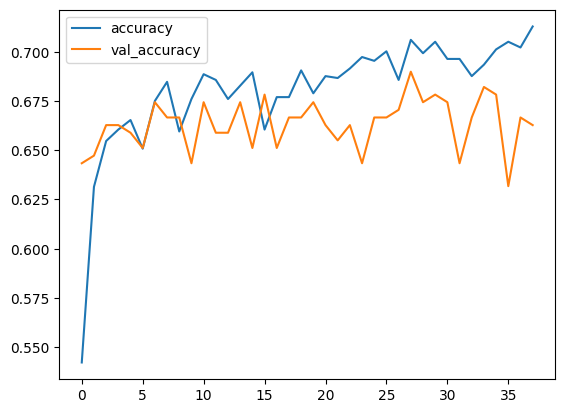

In [715]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot()

In [716]:
preds = model.predict_classes(X_test)

In [717]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       119
           1       0.71      0.63      0.67       139

    accuracy                           0.66       258
   macro avg       0.66      0.67      0.66       258
weighted avg       0.67      0.66      0.66       258



In [718]:
print(confusion_matrix(y_test, preds))

[[83 36]
 [51 88]]


In [719]:
print(explained_variance_score(y_test, preds))

-0.3433891542228402


In [723]:
encoder = Sequential()
encoder.add(Dense(units=6, activation="relu", input_shape = [12]))

In [724]:
decoder = Sequential()
decoder.add(Dense(units=12, activation="relu", input_shape = [6]))

In [725]:
autoencoder = Sequential([encoder, decoder])

In [726]:
autoencoder.compile(loss = BinaryCrossentropy(), optimizer = Adam())

In [727]:
autoencoder.fit(X_eco,X_eco, epochs = 500)

Train on 1289 samples
Epoch 1/500
1289/1289 [==============================] - 0s 314us/sample - loss: 2.9502
Epoch 2/500
1289/1289 [==============================] - 0s 38us/sample - loss: 2.8988
Epoch 3/500
1289/1289 [==============================] - 0s 38us/sample - loss: 2.8522
Epoch 4/500
1289/1289 [==============================] - 0s 37us/sample - loss: 2.7933
Epoch 5/500
1289/1289 [==============================] - 0s 36us/sample - loss: 2.7005
Epoch 6/500
1289/1289 [==============================] - 0s 36us/sample - loss: 2.6581
Epoch 7/500
1289/1289 [==============================] - 0s 37us/sample - loss: 2.6323
Epoch 8/500
1289/1289 [==============================] - 0s 36us/sample - loss: 2.6018
Epoch 9/500
1289/1289 [==============================] - 0s 35us/sample - loss: 2.4529
Epoch 10/500
1289/1289 [==============================] - 0s 37us/sample - loss: 2.1859
Epoch 11/500
1289/1289 [==============================] - 0s 35us/sample - loss: 2.1237
Epoch 12/500
1289/

Epoch 94/500
1289/1289 [==============================] - 0s 37us/sample - loss: 0.2314
Epoch 95/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.2306
Epoch 96/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.2298
Epoch 97/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.2291
Epoch 98/500
1289/1289 [==============================] - 0s 37us/sample - loss: 0.2284
Epoch 99/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.2276
Epoch 100/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.2275
Epoch 101/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.2267
Epoch 102/500
1289/1289 [==============================] - 0s 39us/sample - loss: 0.2260
Epoch 103/500
1289/1289 [==============================] - 0s 42us/sample - loss: 0.2248
Epoch 104/500
1289/1289 [==============================] - 0s 39us/sample - loss: 0.2250
Epoch 105/500
1289/1289 [==

1289/1289 [==============================] - 0s 35us/sample - loss: 0.1892
Epoch 187/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1891
Epoch 188/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1891
Epoch 189/500
1289/1289 [==============================] - 0s 34us/sample - loss: 0.1890
Epoch 190/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1889
Epoch 191/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1888
Epoch 192/500
1289/1289 [==============================] - 0s 34us/sample - loss: 0.1887
Epoch 193/500
1289/1289 [==============================] - 0s 34us/sample - loss: 0.1886
Epoch 194/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1886
Epoch 195/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1885
Epoch 196/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1884
Epoch 197/500
1289/1289 [==========

1289/1289 [==============================] - 0s 35us/sample - loss: 0.1823
Epoch 279/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1821
Epoch 280/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1821
Epoch 281/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1821
Epoch 282/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1820
Epoch 283/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1820
Epoch 284/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1819
Epoch 285/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1820
Epoch 286/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1819
Epoch 287/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1818
Epoch 288/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1817
Epoch 289/500
1289/1289 [==========

1289/1289 [==============================] - 0s 35us/sample - loss: 0.1808
Epoch 371/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1805
Epoch 372/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1805
Epoch 373/500
1289/1289 [==============================] - 0s 34us/sample - loss: 0.1805
Epoch 374/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1805
Epoch 375/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1805
Epoch 376/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1804
Epoch 377/500
1289/1289 [==============================] - 0s 37us/sample - loss: 0.1804
Epoch 378/500
1289/1289 [==============================] - 0s 34us/sample - loss: 0.1804
Epoch 379/500
1289/1289 [==============================] - 0s 35us/sample - loss: 0.1804
Epoch 380/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1804
Epoch 381/500
1289/1289 [==========

1289/1289 [==============================] - 0s 37us/sample - loss: 0.1798
Epoch 463/500
1289/1289 [==============================] - 0s 38us/sample - loss: 0.1798
Epoch 464/500
1289/1289 [==============================] - 0s 37us/sample - loss: 0.1798
Epoch 465/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1798
Epoch 466/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1798
Epoch 467/500
1289/1289 [==============================] - 0s 37us/sample - loss: 0.1797
Epoch 468/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1797
Epoch 469/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1797
Epoch 470/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1797
Epoch 471/500
1289/1289 [==============================] - 0s 37us/sample - loss: 0.1797
Epoch 472/500
1289/1289 [==============================] - 0s 36us/sample - loss: 0.1797
Epoch 473/500
1289/1289 [==========

<AxesSubplot:>

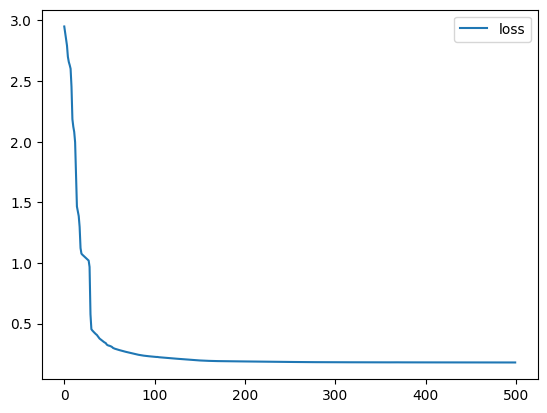

In [728]:
pd.DataFrame(autoencoder.history.history).plot()

In [729]:
ecoPRe = encoder.predict(X_eco)

In [730]:
ecod = pd.DataFrame(ecoPRe)[[0,1]]

In [731]:
X = ecod.values
y  = df["Heart_ stroke"].values

In [732]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [733]:
from tensorflow.keras.optimizers import SGD

In [734]:
model = Sequential()
model.add(Dense(units=200, activation="relu"))
model.add(Dense(units=160, activation="relu"))
model.add(Dense(units=130, activation="relu"))
model.add(Dense(units=130, activation="relu"))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=80, activation="relu"))
model.add(Dense(units=70, activation="relu"))
model.add(Dense(units=60, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=40, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = BinaryCrossentropy(), optimizer = Adam(), metrics = ["accuracy"])

In [735]:
stop = EarlyStopping(patience=30)

In [736]:
model.fit(X_train,y_train, epochs = 300, validation_data = (X_test, y_test), callbacks = [stop])

Train on 902 samples, validate on 387 samples
Epoch 1/300
902/902 [==============================] - 2s 2ms/sample - loss: 0.6909 - accuracy: 0.5233 - val_loss: 0.6841 - val_accuracy: 0.5866
Epoch 2/300
902/902 [==============================] - 1s 1ms/sample - loss: 0.6794 - accuracy: 0.5887 - val_loss: 0.6777 - val_accuracy: 0.5866
Epoch 3/300
902/902 [==============================] - 1s 1ms/sample - loss: 0.6818 - accuracy: 0.5510 - val_loss: 0.6928 - val_accuracy: 0.5168
Epoch 4/300
902/902 [==============================] - 1s 1ms/sample - loss: 0.6786 - accuracy: 0.5676 - val_loss: 0.6708 - val_accuracy: 0.5866
Epoch 5/300
902/902 [==============================] - 1s 1ms/sample - loss: 0.6761 - accuracy: 0.5865 - val_loss: 0.6881 - val_accuracy: 0.5013
Epoch 6/300
902/902 [==============================] - 1s 910us/sample - loss: 0.6787 - accuracy: 0.5798 - val_loss: 0.6714 - val_accuracy: 0.6176
Epoch 7/300
902/902 [==============================] - 1s 903us/sample - loss: 0.6

902/902 [==============================] - 1s 864us/sample - loss: 0.6349 - accuracy: 0.6231 - val_loss: 0.6288 - val_accuracy: 0.6486
Epoch 57/300
902/902 [==============================] - 1s 1ms/sample - loss: 0.6322 - accuracy: 0.6164 - val_loss: 0.6423 - val_accuracy: 0.6357
Epoch 58/300
902/902 [==============================] - 1s 809us/sample - loss: 0.6403 - accuracy: 0.6131 - val_loss: 0.6393 - val_accuracy: 0.6434
Epoch 59/300
902/902 [==============================] - 1s 780us/sample - loss: 0.6392 - accuracy: 0.6231 - val_loss: 0.6357 - val_accuracy: 0.6434
Epoch 60/300
902/902 [==============================] - 1s 800us/sample - loss: 0.6392 - accuracy: 0.6220 - val_loss: 0.6446 - val_accuracy: 0.6331
Epoch 61/300
902/902 [==============================] - 1s 778us/sample - loss: 0.6403 - accuracy: 0.6275 - val_loss: 0.6324 - val_accuracy: 0.6486
Epoch 62/300
902/902 [==============================] - 1s 777us/sample - loss: 0.6434 - accuracy: 0.6286 - val_loss: 0.6465 - 

<AxesSubplot:>

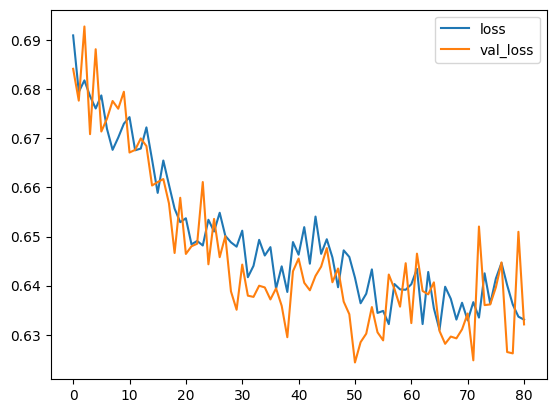

In [737]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [738]:
pred = model.predict_classes(X_test)

In [739]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.59      0.77      0.67       181
           1       0.72      0.53      0.61       206

    accuracy                           0.64       387
   macro avg       0.66      0.65      0.64       387
weighted avg       0.66      0.64      0.64       387



In [740]:
print(confusion_matrix(y_test, pred))

[[139  42]
 [ 97 109]]


In [741]:
print(explained_variance_score(y_test, pred))

-0.36158343614225164
